# **CUSTOMER CHUN ANALYSIS**
<p>Here is a telecommunication company that includes customer information such as demographics, usage patterns churned or not churned.</p>

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn

In [2]:
#Now, let's load our dataset and view the first 10 observations
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#Let's determine the size of the dataset in the format (row, column)
telcom.shape

(7043, 21)

In [4]:
#It is observed that there are 7043 rows and 21 columns
#Let us view the properties of the dataset

telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Let us view the statistical summary of each numerical feature

telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
''' It is observed that the SeniorCitizen is in 0's ans 1's.
    The SeniorCitizen feature/attribute will be converted to boolean values for easy analysis'''

#telcom['SeniorCitizen'].replace({0:False, 1:True}, inplace=True)

" It is observed that the SeniorCitizen is in 0's ans 1's.\n    The SeniorCitizen feature/attribute will be converted to boolean values for easy analysis"

In [8]:
#Convert the remaining Yes and No values to Boolean Values

'''telcom.replace({'Partner':{'No':False, 'Yes': True}},
               {'Dependents':{'No':False, 'Yes': True}},
               inplace=True
               )

telcom.head()'''

"telcom.replace({'Partner':{'No':False, 'Yes': True}},\n               {'Dependents':{'No':False, 'Yes': True}},\n               inplace=True\n               )\n\ntelcom.head()"

In [9]:
'''telcom.replace({'Phone Service':{'No':False, 'Yes': True}},
               {'Paperless Billing':{'No':False, 'Yes': True}},
               inplace=True
               )'''

"telcom.replace({'Phone Service':{'No':False, 'Yes': True}},\n               {'Paperless Billing':{'No':False, 'Yes': True}},\n               inplace=True\n               )"

In [10]:
#Let's check for missing values within the dataset

telcom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<p><i>It is observed that there are no missing values within the dataset. Hence, let us check for outliers using a box plot and check for duplicates.</i></p>

<Axes: >

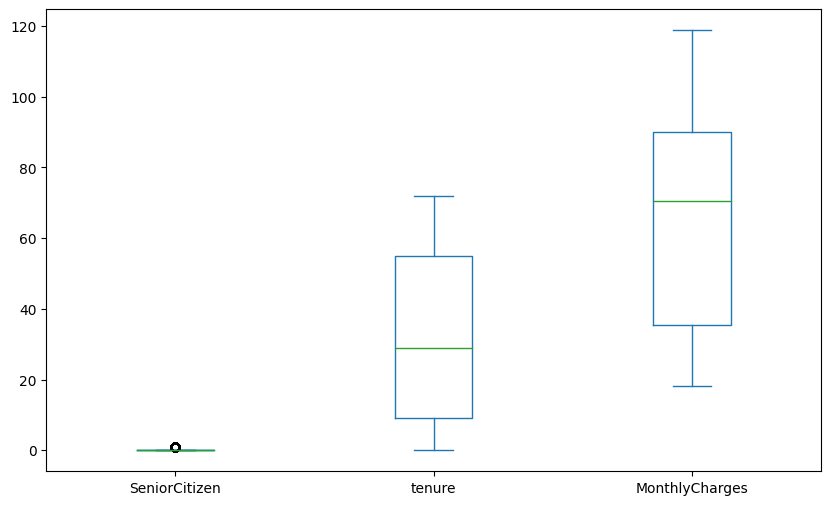

In [11]:
telcom.plot(kind = 'box', vert = True, figsize = (10, 6))

<Axes: ylabel='Density'>

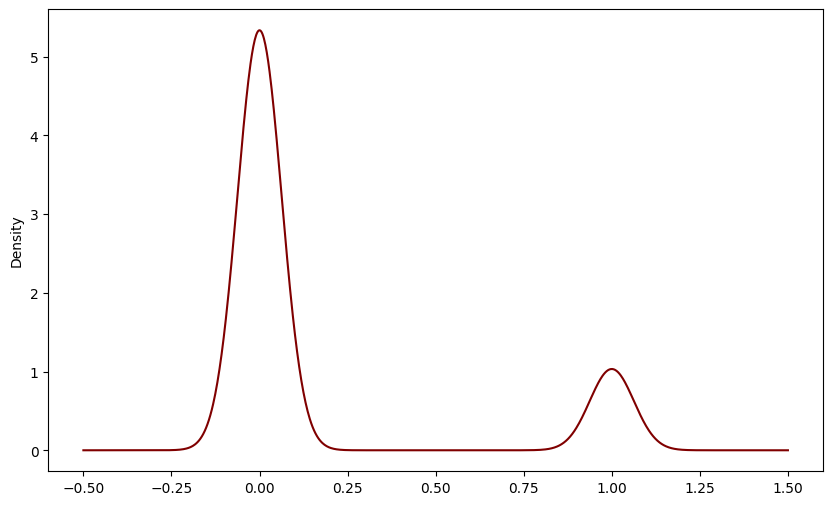

In [12]:
telcom['SeniorCitizen'].plot(kind = 'density', figsize = (10,6), color = 'maroon')

<Axes: ylabel='Density'>

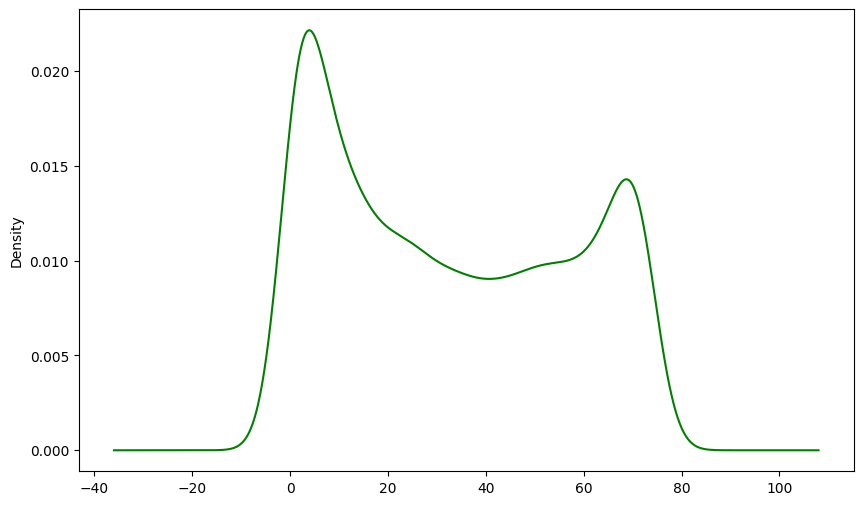

In [13]:
telcom['tenure'].plot(kind = 'density', figsize = (10,6), color = 'green')

<Axes: ylabel='Density'>

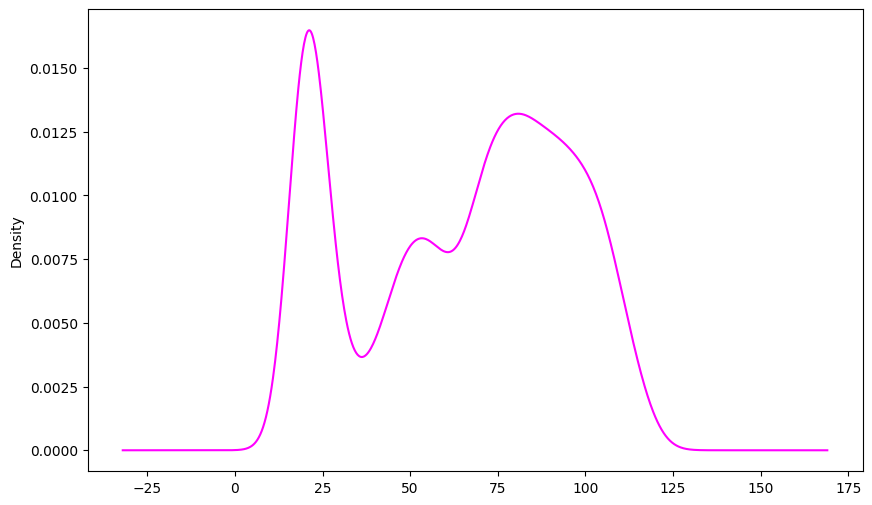

In [14]:
telcom['MonthlyCharges'].plot(kind = 'density', figsize = (10,6), color = 'magenta')

In [15]:
#Now, let's check for duplicte values
telcom.duplicated().sum()

0

<p><i>To further the analysis, unnecessary columns will be dropped</i><p>

In [16]:
telcom.drop(columns = 'customerID', inplace = True)
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<p><b><h3><i>One Hot Encoding</i></h3></b></p>

<p><i>We shall model our dataset by creating dummy variables with a pipeline.

Now, let's get at it. 💪
</i></p>